# Prediction Intervals
Use Prediction intervals as a way to quantify and communicate the uncertainty in a single prediction.

Here we create a smaple dataset with some noise. Generate 1,000 samples of two two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 10.

We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.


In [11]:
# generate related variables
from numpy import mean
from numpy import power
from numpy import sqrt
from numpy import std
from numpy import sum as arraysum
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# summarize
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y)))

x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


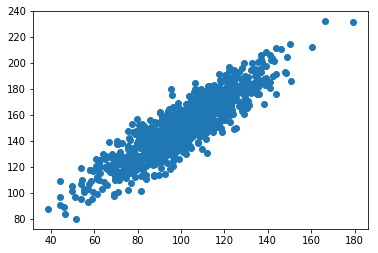

In [3]:
# plot
pyplot.scatter(x, y)
pyplot.show()

Fit a simple regression model that given x predicts y

In [7]:
# fit linear regression model
from scipy.stats import linregress
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0=%.3f, b1=%.3f' % (b1, b0))

b0=1.011, b1=49.117


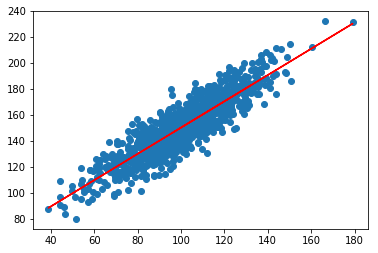

In [8]:
# make prediction
yhat = b0 + b1 * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='r')
pyplot.show()

Take a sample to predict, prediction and expected value. We get also the standard deviation in the predictions.

In [12]:
# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)

We will use the significance level of 95%, which is the Gaussian critical value of 1.69 and calculate the prediction interval for the single value.

Prediction Interval: 20.204
95% likelihood that the true value is between 160.750 and 201.159
True value: 183.124


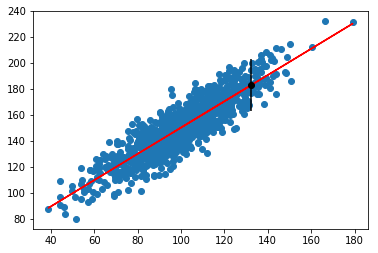

In [12]:
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % yhat_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()